# Agent-based Modeling: Covid-19

This notebook contains an implementation of our Covid-19 simulation using agent-based modeling. We want to demonstrate how the spread of the virus affects our society. The model was implemented using [BPTK_Py](https://bptk.transentis-labs.com/en/latest/docs/api/api_overview.html#). This framework not only enables us to do agent-based modeling, it can also manage simulation scenarios easily.

In [1]:
from BPTK_Py.bptk import bptk

bptk = bptk()

The assumptions are based on the current situation in Germany. With this model, the goal is to figure out the amount of people an infected person infects over a certain period of time. One person is equivalent to one agent.

__Assumptions__

_Model_
- Contact Rate: 20 persons. Defines how many people a person encounters per day in average.
- Infectivity: 0.7%. Defines the probability that a person becomes infected after contact with an infectious person.

_Agent_
- All agents can get infected.
- One agent can have the following states: `HEALTHY`, `INFECTED WITH NO/LIGHT SYMPTOMS`, `INFECTED WITH STRONG SYMPTOMS`
- Only agents with no/light symptoms can infect other agents. Agents with strong symptoms "stay at home/ are in quarantine" and cannot infect other agents.

## Base Scenario

The base scenario presents the results of the above assumptions. Instead of 80 million agents we only create 8,000 agents. Running 80 mio. agents through the model would take forever. However, it won't falsify the results. In the beginning, we define the state each agent randomly. The following plot shows the number of agents who are healthy, infected with no/light symptoms and strong symptoms for each day.

Output()

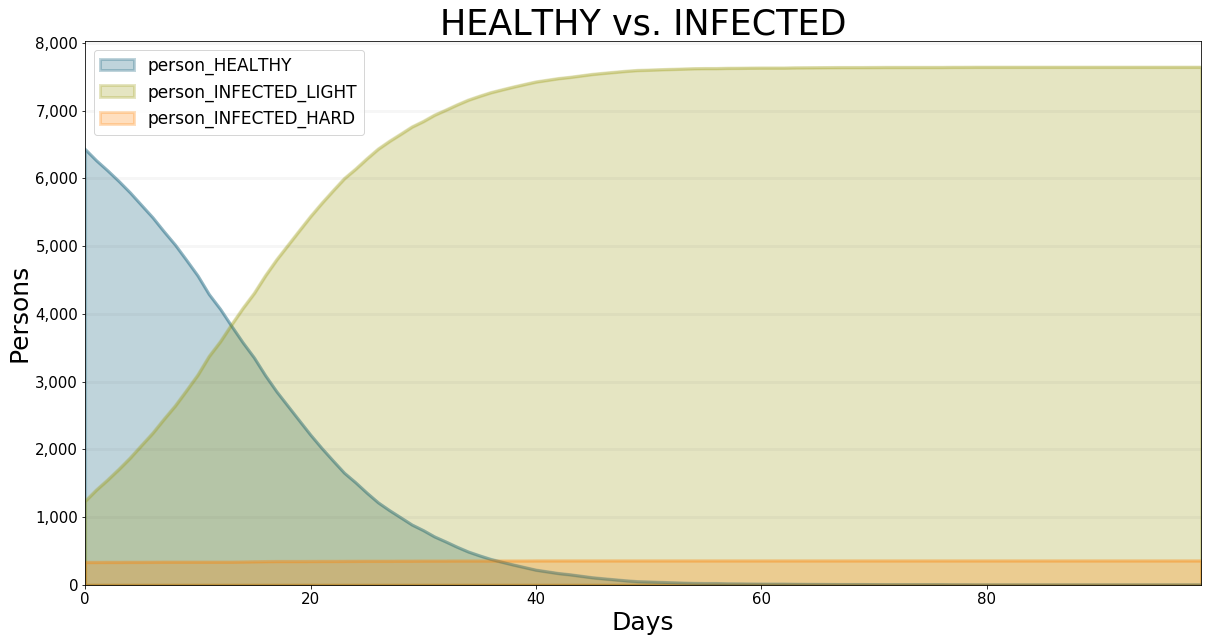

In [2]:
bptk.plot_scenarios(
    scenario_managers=["Covid19"],
    kind="area",
    title="HEALTHY vs. INFECTED",
    x_label="Days",
    y_label="Persons",
    scenarios=["base"],
    agents=["person"],
    agent_states=["HEALTHY","INFECTED_LIGHT","INFECTED_HARD"],
    series_names={
        "person_HEALTHY":"Healthy",
        "person_INFECTED_LIGHT":"Infected with light symptoms",
        "person_INFECTED_HARD":"Infected with strong symptoms",
    },
    visualize_to_period = 100,
    progress_bar=True
    
)

In [3]:
bptk.plot_scenarios(
    scenario_managers=["Covid19"],
    kind="area",
    title="Number Infected Persons",
    x_label="Days",
    y_label="Persons",
    scenarios=["base"],
    agents=["person"],
    agent_states=["HEALTHY","INFECTED_HARD","INFECTED_LIGHT"],
    return_df=True,
    visualize_to_period = 30
)

,person_HEALTHY,person_INFECTED_LIGHT,person_INFECTED_HARD
t,,,
0,6433.0,1234,333
1,6266.0,1401,333
2,6117.0,1549,334
3,5959.0,1707,334
4,5791.0,1874,335
5,5607.0,2058,335
6,5424.0,2240,336
7,5217.0,2446,337
8,5019.0,2644,337


The second plot is the more interesting one. It helps us to figure out how many agents one agent infects over a certain period of time. According to the plot it infects around 0.13 agents per day. 

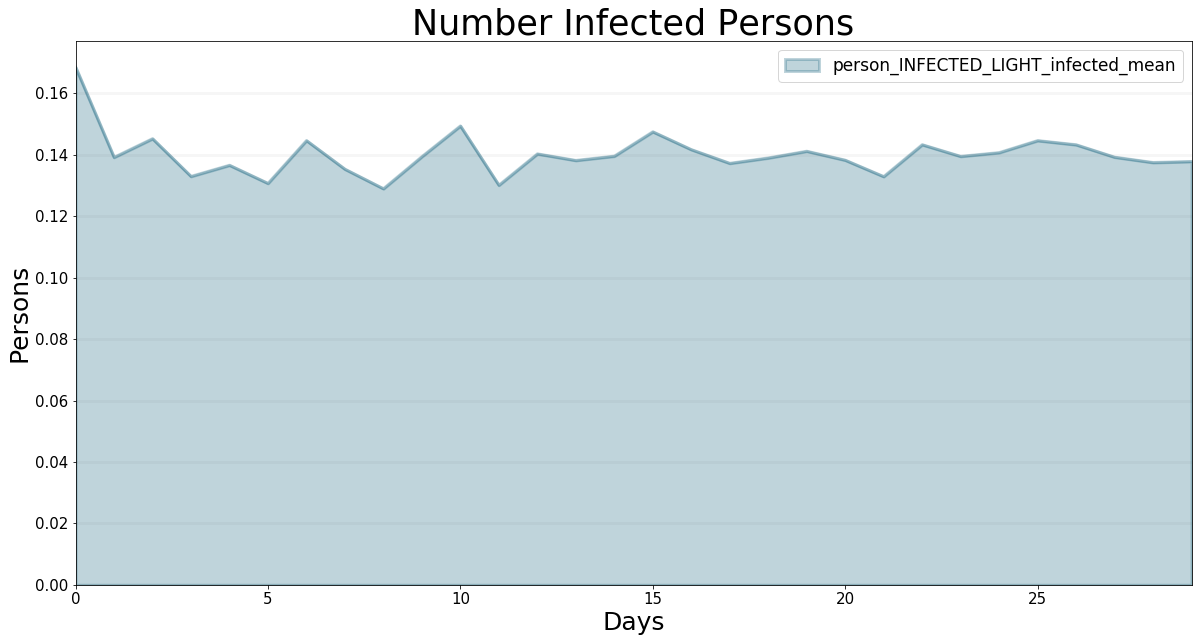

In [4]:
bptk.plot_scenarios(
    scenario_managers=["Covid19"],
    kind="area",
    title="Number Infected Persons",
    x_label="Days",
    y_label="Persons",
    scenarios=["base"],
    agents=["person"],
    agent_properties=["infected"],
    agent_property_types=["mean"],
    agent_states=["INFECTED_LIGHT"],
    visualize_to_period = 30
)

The above plot gives us a roughly number. However, we can also compute the exact number of agents getting infected per day in average.

In [5]:
r0_df = bptk.plot_scenarios(
    scenario_managers=["Covid19"],
    kind="area",
    title="Number Infected Persons",
    x_label="Days",
    y_label="Persons",
    scenarios=["base"],
    agents=["person"],
    agent_properties=["infected"],
    agent_property_types=["mean"],
    agent_states=["INFECTED_LIGHT"],
    visualize_to_period = 30,
    return_df=True
)

As shown below, one agent infects 0.14 agents per day.

In [7]:
r0_df.mean()

person_INFECTED_LIGHT_infected_mean    0.140099
dtype: float64

Within 20 days, one agent infects two other agents.

In [21]:
r0_df.mean()*20

person_INFECTED_LIGHT_infected_mean    2.448413
dtype: float64